In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

import sympy as spy
spy.init_printing()

In [2]:
def getSignificant(value, uncertainty):
    u = "%.0e"%uncertainty
    uval, uexp = u.split('e')
    uval = int(uval)
    uexp = int(uexp)
    
    v = "%.0e"%value
    vval, vexp = v.split('e')
    vval = int(vval)
    vexp = int(vexp)
    
    exp = vexp - uexp
    
    vval = value*10**-uexp
    vval = int(round(vval, 0))
    
    return (vval, uval, uexp)

def makeString(value, uncertainty, base):
    return r"(%d \pm %d)\times10^{%d}"%(value, uncertainty, base)

In [3]:
percent, density = np.genfromtxt('perry.txt', skip_header = 1).T

(m, b), cov = np.polyfit(percent, density, 1, cov = True)
dm = cov[0, 0]** 0.5
db = cov[1, 1]** 0.5

In [4]:
mtext = makeString(*getSignificant(m, dm))
btext = makeString(*getSignificant(b, db))

eq =  "$f(x) = %s$"%mtext + '$x$' + '+ $%s$'%btext

In [5]:
def getWeight(m, b, d):
    return (d - b) / m

def getWeightUnc(m, b, d, dm, db):
    return ((dm * (d - b) / m**2)**2 + (db / m)**2)**0.5

def getMolarity(wt, d, MW = 36.46):
    return ((wt * d) / MW) * 10

def getMolarityUnc(C, m, b, d, dm, db):
    dw = getWeightUnc(m, b, d, dm, db)
    return C * (dw**2 + 0.00001)**0.5

In [6]:
d = 1.01283
wt = getWeight(m, b, d)
dw = getWeightUnc(m, b, d, dm, db)
C = getMolarity(wt, d)
dC = getMolarityUnc(C, m, b, d, dm, db)

cText = makeString(*getSignificant(C, dC))

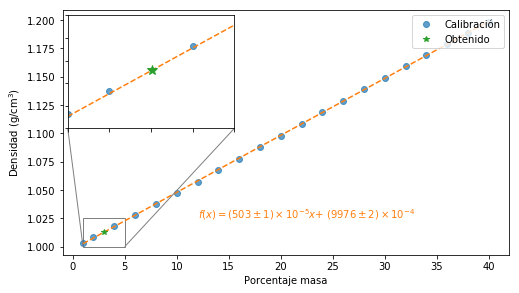

In [7]:
fig, ax = plt.subplots(figsize = (8, 4.5))

axins = zoomed_inset_axes(ax, 4, loc = 2) # zoom-factor: 2.5, location: upper-left

y = m*percent + b

c1 = ax.plot(percent, density, 'o', alpha = 0.7, label = 'Calibración')[0].get_color()
c2 = ax.plot(percent, y, '--')[0].get_color()
c3 = ax.plot(wt, d, '*', label = 'Obtenido')[0].get_color()

axins.plot(percent, density, 'o', alpha = 0.7, c = c1)
axins.plot(percent, y, '--', c = c2)
axins.plot(wt, d, '*', c = c3, ms = 10)

axins.set_xlim(1, 5) # apply the x-limits
axins.set_ylim(1, 1.025) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

ax.legend(loc = 1)

ax.text(12, 1.025, eq, color = c2)

ax.set_xlabel("Porcentaje masa")
ax.set_ylabel("Densidad (g/cm$^3$)")

plt.savefig('C_HCl_initial.png', dpi = 300)

plt.show()

In [8]:
wt, dw

In [9]:
C, dC

In [10]:
makeString(*getSignificant(wt, dw))

'(302 \\pm 5)\\times10^{-2}'

In [11]:
makeString(*getSignificant(C, dC))

'(84 \\pm 4)\\times10^{-2}'

# Final concentration uncertainty

In [24]:
C, m, mh, mm, rhos, rhof, dm, drho, dh = spy.symbols(r'C_s m_s m_{H_2O} m_m \rho_s \rho_f \delta_m \delta\rho \delta_{m_m}')

In [25]:
C, m, mh, mm, rhos, rhof, dm, drho, dh

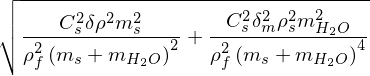

In [30]:
C_ = (C * m / (m + mh)) * rhos / rhof
dm_ = (C_.diff(m)*dm).simplify()
drho_ = (C_.diff(rhos) + C.diff(rhof))*drho

dh_ = C.diff(mh)*dh

dC = spy.sqrt(dm_**2 + drho_**2 + dh_**2)
dC

# KHCO3 uncertainty

In [12]:
m, rho, mp, mh, dm, drho, dh = spy.symbols(r'm \rho m_p m_h \delta_m \delta_\rho \delta_{m_h}')

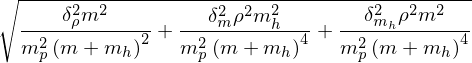

In [13]:
C = m * rho / (mp * (m + mh))
dm_ = (C.diff(m)*dm).simplify()
drho_ = C.diff(rho)*drho
dh_ = C.diff(mh)*dh

dC = spy.sqrt(dm_**2 + drho_**2 + dh_**2)
dC

In [14]:
values = [(m, 0.10143),
         (rho, 1.003662),
         (mp, 100.42),
         (mh, 9.93551),
         (dm, 0.00001),
         (drho, 0.000001),
         (dh, 0.00001)]

dC.subs(values)*1000

In [15]:
C.subs(values)*1000

In [16]:
print(spy.latex(dC))

\sqrt{\frac{\delta_\rho^{2} m^{2}}{m_{p}^{2} \left(m + m_{h}\right)^{2}} + \frac{\delta_m^{2} \rho^{2} m_{h}^{2}}{m_{p}^{2} \left(m + m_{h}\right)^{4}} + \frac{\delta_{m_h}^{2} \rho^{2} m^{2}}{m_{p}^{2} \left(m + m_{h}\right)^{4}}}
